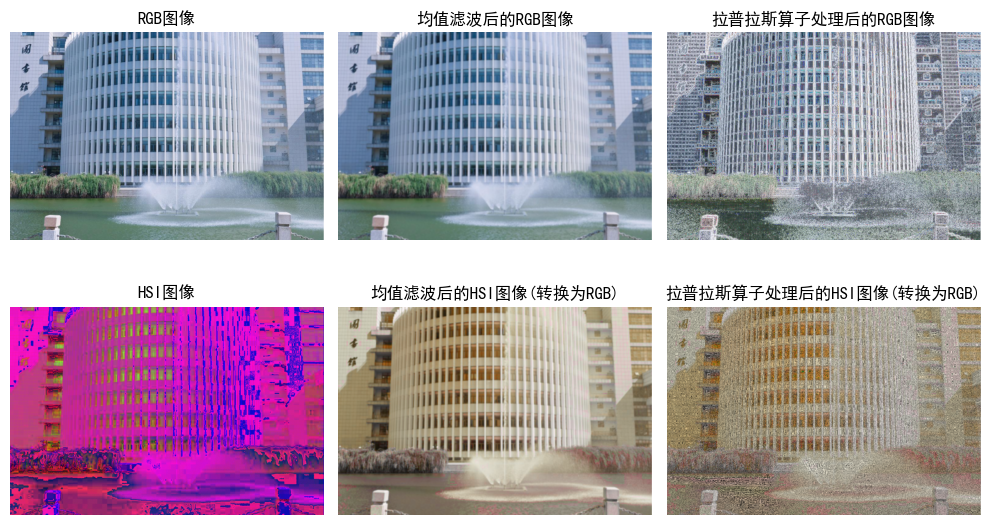

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numpy import cos, arccos, sqrt, power, pi

# HSI转RGB
def hsi_rgb(hsi):
    if hsi.dtype.type == np.uint8:
        hsi = (hsi).astype('float64') / 255.0
    for k in range(hsi.shape[0]):
        for j in range(hsi.shape[1]):
            h, s, i = hsi[k, j, 0], hsi[k, j, 1], hsi[k, j, 2]
            r, g, b = 0, 0, 0
            if 0 <= h < 2/3*pi:
                b = i * (1 - s)
                r = i * (1 + s * cos(h) / cos(pi/3-h))
                g = 3 * i - (b + r)
            elif 2/3*pi <= h < 4/3*pi:
                r = i * (1 - s)
                g = i * (1 + s * cos(h-2/3*pi) / cos(pi - h))
                b = 3 * i - (r + g)
            elif 4/3*pi <= h <= 5/3*pi:
                g = i * (1 - s)
                b = i * (1 + s * cos(h - 4/3*pi) / cos(5/3*pi - h))
                r = 3 * i - (g + b)
            hsi[k, j, 0], hsi[k, j, 1], hsi[k, j, 2] = r, g, b
    return (hsi * 255).astype('uint8')

# RGB转HSI
def rgb_hsi(rgb):
    if rgb.dtype.type == np.uint8:
        rgb = rgb.astype('float64')/255.0
    for i in range(rgb.shape[0]):
        for j in range(rgb.shape[1]):
            r, g, b = rgb[i, j, 0], rgb[i, j, 1], rgb[i, j, 2]
            # 计算h
            num = 0.5 * ((r-g)+(r-b))
            den = sqrt(power(r-g, 2)+(r-b)*(g-b))
            theta = arccos(num/den) if den != 0 else 0
            rgb[i, j, 0] = theta if b <= g else (2*pi-theta)
            # 计算s
            rgb[i, j, 1] = (1 - 3 * min([r, g, b]) / (r+g+b)) if r+g+b != 0 else 0
            # 计算i
            rgb[i, j, 2] = 1 / 3 * (r+g+b)
    return (rgb * 255).astype('uint8')

# 读取RGB图像
origin = cv2.imread("D:/picture/school.png")
original = cv2.cvtColor(origin, cv2.COLOR_BGR2RGB)

# 对RGB图像进行均值滤波
mean_filtered_rgb = cv2.blur(original, (5, 5))

# 对RGB图像进行拉普拉斯变换（分别处理每个通道）
r_channel, g_channel, b_channel = cv2.split(original)
laplacian_r = cv2.Laplacian(r_channel, cv2.CV_64F,ksize=5)
laplacian_g = cv2.Laplacian(g_channel, cv2.CV_64F,ksize=5)
laplacian_b = cv2.Laplacian(b_channel, cv2.CV_64F,ksize=5)

# 合并拉普拉斯变换的结果
laplacian_image = cv2.merge((laplacian_r, laplacian_g, laplacian_b))
laplacian_rgb = cv2.convertScaleAbs(laplacian_image)
overlay0 = cv2.addWeighted(original, 0.5,laplacian_rgb , 0.5, 0)
# RGB转HSI
hsi_original = rgb_hsi(original)

# 对I通道进行均值滤波和拉普拉斯变换
i_channel = hsi_original[:, :, 2]
mean_filtered_i = cv2.blur(i_channel, (5, 5))
laplacian_i = cv2.Laplacian(i_channel, cv2.CV_64F,ksize=5)

# 将处理后的I通道合并回HSI
hsi_result_mean = np.copy(hsi_original)
hsi_result_mean[:, :, 2] = mean_filtered_i

hsi_result_laplacian = np.copy(hsi_original)
hsi_result_laplacian[:, :, 2] = laplacian_i
overlay1 = cv2.addWeighted(hsi_original, 0.5,hsi_result_laplacian , 0.5, 0)
# HSI转RGB
result_mean_rgb = hsi_rgb(hsi_result_mean)
result_laplacian_rgb = hsi_rgb(overlay1)

plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体显示中文
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题
# 显示结果
plt.figure(figsize=(10, 6))

plt.subplot(231)
plt.imshow(original)
plt.title('RGB图像')
plt.axis('off')

plt.subplot(232)
plt.imshow(mean_filtered_rgb)
plt.title('均值滤波后的RGB图像')
plt.axis('off')

plt.subplot(233)
plt.imshow(overlay0)
plt.title('拉普拉斯算子处理后的RGB图像')
plt.axis('off')

plt.subplot(234)
plt.imshow(hsi_original)
plt.title('HSI图像')
plt.axis('off')

plt.subplot(235)
plt.imshow(result_mean_rgb)
plt.title('均值滤波后的HSI图像(转换为RGB)')
plt.axis('off')

plt.subplot(236)
plt.imshow(result_laplacian_rgb)
plt.title('拉普拉斯算子处理后的HSI图像(转换为RGB)')
plt.axis('off')

plt.tight_layout()
plt.show()


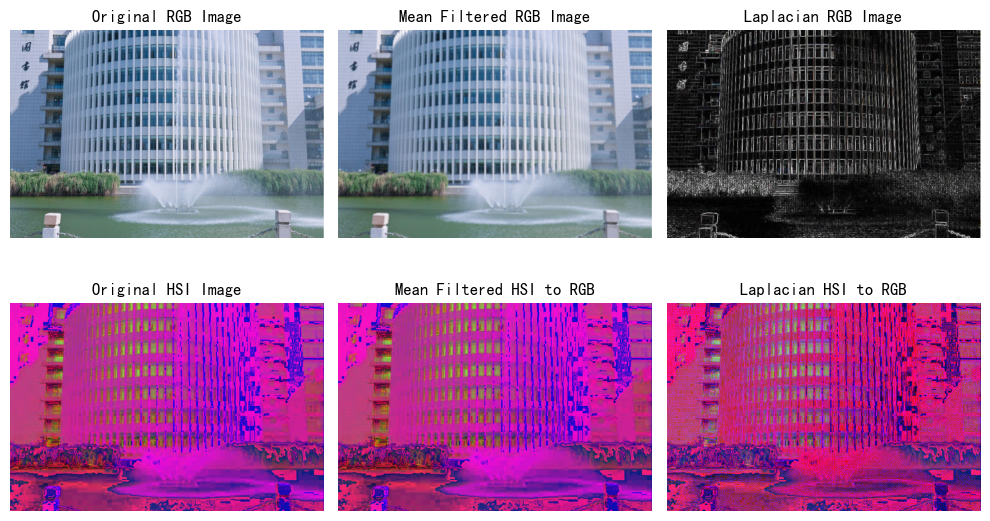

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numpy import cos, arccos, sqrt, power, pi

# HSI转RGB
def hsi_rgb(hsi):
    if hsi.dtype.type == np.uint8:
        hsi = (hsi).astype('float64') / 255.0
    for k in range(hsi.shape[0]):
        for j in range(hsi.shape[1]):
            h, s, i = hsi[k, j, 0], hsi[k, j, 1], hsi[k, j, 2]
            r, g, b = 0, 0, 0
            if 0 <= h < 2/3*pi:
                b = i * (1 - s)
                r = i * (1 + s * cos(h) / cos(pi/3-h))
                g = 3 * i - (b + r)
            elif 2/3*pi <= h < 4/3*pi:
                r = i * (1 - s)
                g = i * (1 + s * cos(h-2/3*pi) / cos(pi - h))
                b = 3 * i - (r + g)
            elif 4/3*pi <= h <= 5/3*pi:
                g = i * (1 - s)
                b = i * (1 + s * cos(h - 4/3*pi) / cos(5/3*pi - h))
                r = 3 * i - (g + b)
            hsi[k, j, 0], hsi[k, j, 1], hsi[k, j, 2] = r, g, b
    return (hsi * 255).astype('uint8')

# RGB转HSI
def rgb_hsi(rgb):
    if rgb.dtype.type == np.uint8:
        rgb = rgb.astype('float64')/255.0
    for i in range(rgb.shape[0]):
        for j in range(rgb.shape[1]):
            r, g, b = rgb[i, j, 0], rgb[i, j, 1], rgb[i, j, 2]
            # 计算h
            num = 0.5 * ((r-g)+(r-b))
            den = sqrt(power(r-g, 2)+(r-b)*(g-b))
            theta = arccos(num/den) if den != 0 else 0
            rgb[i, j, 0] = theta if b <= g else (2*pi-theta)
            # 计算s
            rgb[i, j, 1] = (1 - 3 * min([r, g, b]) / (r+g+b)) if r+g+b != 0 else 0
            # 计算i
            rgb[i, j, 2] = 1 / 3 * (r+g+b)
    return (rgb * 255).astype('uint8')

# 读取RGB图像
origin = cv2.imread("D:/picture/school.png")
original = cv2.cvtColor(origin, cv2.COLOR_BGR2RGB)

# 对RGB图像进行均值滤波
mean_filtered_rgb = cv2.blur(original, (5, 5))

# 对RGB图像进行拉普拉斯变换（分别处理每个通道）
r_channel, g_channel, b_channel = cv2.split(original)
laplacian_r = cv2.Laplacian(r_channel, cv2.CV_64F,ksize=3)
laplacian_g = cv2.Laplacian(g_channel, cv2.CV_64F,ksize=3)
laplacian_b = cv2.Laplacian(b_channel, cv2.CV_64F,ksize=3)

# 合并拉普拉斯变换的结果
laplacian_image = cv2.merge((laplacian_r, laplacian_g, laplacian_b))
laplacian_rgb = cv2.convertScaleAbs(laplacian_image)
# RGB转HSI
hsi_original = rgb_hsi(original)

# 对I通道进行均值滤波和拉普拉斯变换
i_channel = hsi_original[:, :, 2]
mean_filtered_i = cv2.blur(i_channel, (5, 5))
laplacian_i = cv2.Laplacian(i_channel, cv2.CV_64F)

# 将处理后的I通道合并回HSI
hsi_result_mean = np.copy(hsi_original)
hsi_result_mean[:, :, 2] = mean_filtered_i

hsi_result_laplacian = np.copy(hsi_original)
hsi_result_laplacian[:, :, 2] = laplacian_i

# HSI转RGB
result_mean_rgb = hsi_rgb(hsi_result_mean)
result_laplacian_rgb = hsi_rgb(hsi_result_laplacian)

# 显示结果
plt.figure(figsize=(10, 6))

plt.subplot(231)
plt.imshow(original)
plt.title('Original RGB Image')
plt.axis('off')

plt.subplot(232)
plt.imshow(mean_filtered_rgb)
plt.title('Mean Filtered RGB Image')
plt.axis('off')

plt.subplot(233)
plt.imshow(laplacian_rgb, cmap='gray')
plt.title('Laplacian RGB Image')
plt.axis('off')

plt.subplot(234)
plt.imshow(hsi_original)
plt.title('Original HSI Image')
plt.axis('off')

plt.subplot(235)
plt.imshow(hsi_result_mean)
plt.title('Mean Filtered HSI to RGB')
plt.axis('off')

plt.subplot(236)
plt.imshow(hsi_result_laplacian)
plt.title('Laplacian HSI to RGB')
plt.axis('off')

plt.tight_layout()
plt.show()
